<a href="https://colab.research.google.com/github/rajeshwari179/Generalizing-Discriminant-Analysis/blob/main/NDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Cleaning (Used different clustering methods to get the clusters)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from google.colab import drive

Original Dataset

In [ ]:
data = pd.read_json('/content/drive/MyDrive/combined.json', lines=True)
data.head()

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.5,
    max_features = 150,
    stop_words = 'english'
)
tfidf.fit(data.contents)
text = tfidf.transform(data.contents)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 2 clusters
Fit 6 clusters
Fit 10 clusters
Fit 14 clusters
Fit 18 clusters
Fit 22 clusters
Fit 26 clusters
Fit 30 clusters
Fit 34 clusters
Fit 38 clusters


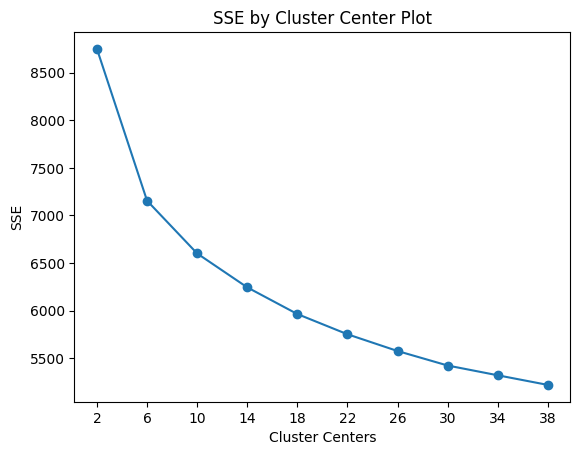

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 4)

    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))

    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

find_optimal_clusters(text, 40)


In [ ]:
# clusters = MiniBatchKMeans(n_clusters=3, init = 'random', init_size=115, batch_size=2048, random_state=20).fit_predict(text)
# from sklearn.cluster import AgglomerativeClustering
clusters = KMeans(n_clusters=20, random_state=20).fit_predict(text)
# clusters = kmeans(n_clusters=20).fit_predict(text.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


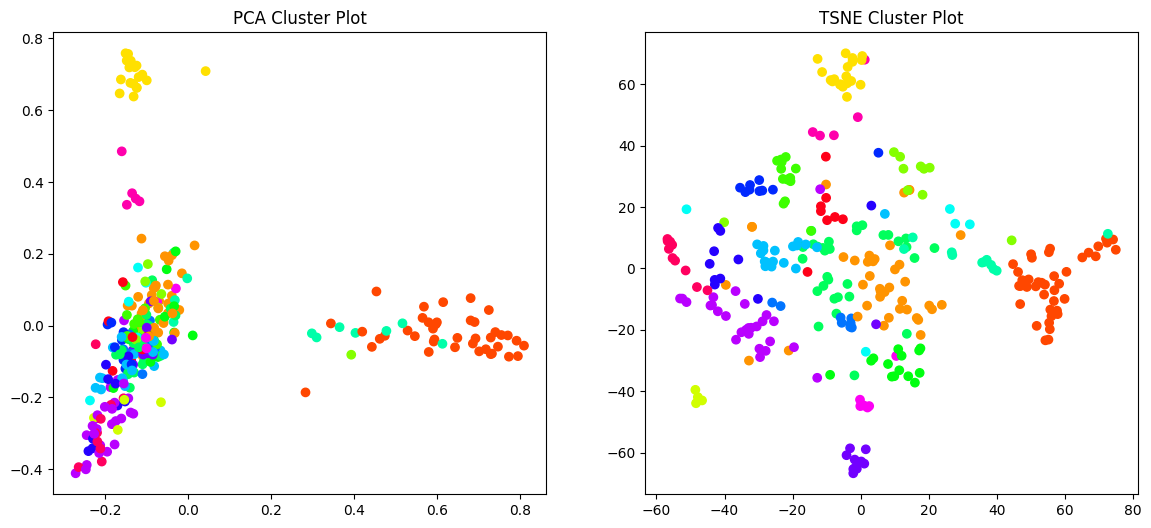

In [ ]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)

    pca = PCA(n_components=2).fit_transform(data[max_items,:].toarray())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].toarray()))


    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv((i+1)/(max_label+1)) for i in label_subset[idx]]

    f, ax = plt.subplots(1, 2, figsize=(14, 6))

    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')

    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

# print(text)
# print(clusters)
plot_tsne_pca(text, clusters)

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    # print(df)
    # print(clusters.shape)
    for i,r in df.iterrows():
        # print(i)
        # print(r)
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
        # pass
get_top_keywords(text, clusters, tfidf.get_feature_names_out(), 10)


Cluster 0
indictment,fraudulent,service,prison,business,false,income,returns,irs,tax

Cluster 1
conspiracy,plea,prison,scheme,company,000,admitted,sentenced,fraud,pleaded

Cluster 2
force,medical,home,fraudulent,services,care,hhs,fraud,health,medicare

Cluster 3
filed,defendants,complaint,gov,settlement,civil,act,rights,discrimination,housing

Cluster 4
conduct,united,fbi,states,companies,maximum,agreed,conspiracy,fine,antitrust

Cluster 5
program,inspector,false,act,civil,states,united,settlement,government,claims

Cluster 6
fraud,maximum,conspiracy,fbi,count,defendants,alleges,charged,charges,indictment

Cluster 7
law,foreign,support,states,york,new,fbi,united,national,security

Cluster 8
united,fraud,million,foreign,income,financial,irs,tax,accounts,bank

Cluster 9
victims,antitrust,state,local,public,crimes,force,fraud,task,financial

Cluster 10
victims,work,country,national,american,state,new,public,crime,law

Cluster 11
law,evidence,prison,crime,conspiracy,sentenced,fbi,county,m

In [ ]:
data.head()

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


In [ ]:
data['clusterid']=clusters
data.head()

,id,title,contents,date,topics,components,clusterid
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)],11
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division],10
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division],12
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division],1
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division],12


In [ ]:
selected_clusters = [0, 1, 5]
filtered_df = data[data['clusterid'].isin(selected_clusters)]
print(filtered_df.shape)
# Sample 100 entries from each cluster
sampled_df = filtered_df.groupby('clusterid').apply(lambda x: x.sample(300))

# Reset the index to get a clean DataFrame
sampled_df = sampled_df.reset_index(drop=True)

sampled_df.head()

(3838, 7)


,id,title,contents,date,topics,components,clusterid
0,09-485,U.S. Court of Appeals for the Fifth Circuit Jo...,"WASHINGTON - On May 15, 2009, the Fifth Circ...",2009-05-18T00:00:00-04:00,[],[Tax Division],0
1,15-1452,Justice Department Sues to Shut Down Abusive T...,The United States filed a civil injunction sui...,2015-11-24T00:00:00-05:00,[Tax],[Tax Division],0
2,13-357,Three Sentenced in Alabama Stolen Identity Ref...,"Mary Bennett, Narendrakumar Patel and Eugeni...",2013-03-28T00:00:00-04:00,[],[Tax Division],0
3,13-545,Las Vegas Physician Sentenced for Tax Evasion ...,"Robert David Forsyth, of Las Vegas, was se...",2013-05-13T00:00:00-04:00,[],[Tax Division],0
4,09-1282,Federal Court Shuts Down Kansas City Tax Preparer,"WASHINGTON – A federal court in Kansas City,...",2009-11-27T00:00:00-05:00,[],[Tax Division],0


In [ ]:
print(sampled_df.shape)

(900, 7)


In [ ]:
print(filtered_df.shape)

(3838, 7)


In [ ]:
csv_path = '/content/drive/MyDrive/oversampled_data.csv'

# Export the DataFrame to a CSV file
sampled_df.to_csv(csv_path, index=False)

# Print a message to confirm the export
print(f"Data exported to {csv_path}")

Data exported to /content/drive/MyDrive/oversampled_data.csv


Undersampled data was generated similarly by just changing the number of samples and features in the above code.

#Under SAMPLED DATA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from google.colab import drive

data1 = pd.read_csv('/content/drive/MyDrive/filtered_data.csv')
data1.head()

,id,title,contents,date,topics,components,clusterid
0,09-364,Utah Natural Gas Producers Agree to Air Emissi...,"WASHINGTON—Six energy companies, in three s...",2009-04-17T00:00:00-04:00,[],['Environment and Natural Resources Division'],0
1,09-1203,Regional Home Builder Agrees \r\nto Clean Wate...,WASHINGTON—John Wieland Homes and Neighborho...,2009-11-06T00:00:00-05:00,[],['Environment and Natural Resources Division'],0
2,16-1003,Two Greek Shipping Companies and Engineers Con...,"A federal jury in Greenville, North Carolina, ...",2016-09-02T00:00:00-04:00,['Environment'],['Environment and Natural Resources Division'],0
3,11-780,United States and Two California State Agencie...,"WASHINGTON – The United States, the Califo...",2011-06-17T00:00:00-04:00,[],['Environment and Natural Resources Division'],0
4,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],['Environment and Natural Resources Division'],0


In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.5,
    max_features = 1000,
    stop_words = 'english'
)
tfidf.fit(data1.contents)
text1 = tfidf.transform(data1.contents)
print(text1)

array_0 = np.zeros(100)
array_1 = np.ones(100)
array_5 = np.full(100, 5)
clusters1 = np.concatenate([array_0, array_1, array_5])

print(clusters1)

  (0, 995)	0.05290215831714215
  (0, 990)	0.048531047382646825
  (0, 978)	0.05120754141759663
  (0, 969)	0.027817653503527506
  (0, 959)	0.07303638175431783
  (0, 956)	0.04713188684342128
  (0, 945)	0.27957908944925636
  (0, 941)	0.04324618043030061
  (0, 920)	0.05686909536408778
  (0, 908)	0.05870649962611126
  (0, 901)	0.05775906932830833
  (0, 890)	0.037180562228117664
  (0, 871)	0.04324618043030061
  (0, 865)	0.05775906932830833
  (0, 859)	0.05523629475542223
  (0, 850)	0.042256137404490926
  (0, 841)	0.37955758246314825
  (0, 806)	0.05308414483372694
  (0, 796)	0.03990229535739136
  (0, 786)	0.031764972466375864
  (0, 783)	0.048531047382646825
  (0, 777)	0.03507983118382654
  (0, 774)	0.053767062128544006
  (0, 770)	0.05686909536408778
  (0, 754)	0.05063177842693795
  :	:
  (299, 211)	0.05962772712385629
  (299, 198)	0.05482811789817335
  (299, 182)	0.07617805020909722
  (299, 181)	0.04192474297203187
  (299, 167)	0.060127902041076695
  (299, 147)	0.15306428367180824
  (299, 140)	

In [ ]:
# # clusters = MiniBatchKMeans(n_clusters=3, init = 'random', init_size=115, batch_size=2048, random_state=20).fit_predict(text)
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3, random_state=1, n_init="auto").fit(text1)
# clusters = kmeans.labels_
# print(clusters)

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    # print(df)
    # print(clusters.shape)
    for i,r in df.iterrows():
        # print(i)
        # print(r)
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
        # pass
get_top_keywords(text1, clusters1, tfidf.get_feature_names_out(), 10)


Cluster 0.0
natural,emissions,oil,environment,clean,water,settlement,environmental,air,epa

Cluster 1.0
years,refunds,indictment,trial,prison,false,income,returns,irs,tax

Cluster 5.0
elections,bailout,voters,activities,observers,monitor,county,election,rights,voting


In [ ]:
# print(clusters1.shape)

#GSVD Implementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from google.colab import drive

clustered_data = pd.read_csv('/content/drive/MyDrive/filtered_data.csv')
clustered_data.head()


,id,title,contents,date,topics,components,clusterid
0,09-364,Utah Natural Gas Producers Agree to Air Emissi...,"WASHINGTON—Six energy companies, in three s...",2009-04-17T00:00:00-04:00,[],['Environment and Natural Resources Division'],0
1,09-1203,Regional Home Builder Agrees \r\nto Clean Wate...,WASHINGTON—John Wieland Homes and Neighborho...,2009-11-06T00:00:00-05:00,[],['Environment and Natural Resources Division'],0
2,16-1003,Two Greek Shipping Companies and Engineers Con...,"A federal jury in Greenville, North Carolina, ...",2016-09-02T00:00:00-04:00,['Environment'],['Environment and Natural Resources Division'],0
3,11-780,United States and Two California State Agencie...,"WASHINGTON – The United States, the Califo...",2011-06-17T00:00:00-04:00,[],['Environment and Natural Resources Division'],0
4,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],['Environment and Natural Resources Division'],0


In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.5,
    max_features = 1000,
    stop_words = 'english'
)
tfidf.fit(clustered_data.contents)
text_ = tfidf.transform(clustered_data.contents)
print(text_.T.shape)
clusters = clustered_data['clusterid'].tolist()
print(clusters)

(1000, 300)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [ ]:
A = text_.T
print(A)

  (995, 0)	0.05290215831714215
  (990, 0)	0.048531047382646825
  (978, 0)	0.05120754141759663
  (969, 0)	0.027817653503527506
  (959, 0)	0.07303638175431783
  (956, 0)	0.04713188684342128
  (945, 0)	0.27957908944925636
  (941, 0)	0.04324618043030061
  (920, 0)	0.05686909536408778
  (908, 0)	0.05870649962611126
  (901, 0)	0.05775906932830833
  (890, 0)	0.037180562228117664
  (871, 0)	0.04324618043030061
  (865, 0)	0.05775906932830833
  (859, 0)	0.05523629475542223
  (850, 0)	0.042256137404490926
  (841, 0)	0.37955758246314825
  (806, 0)	0.05308414483372694
  (796, 0)	0.03990229535739136
  (786, 0)	0.031764972466375864
  (783, 0)	0.048531047382646825
  (777, 0)	0.03507983118382654
  (774, 0)	0.053767062128544006
  (770, 0)	0.05686909536408778
  (754, 0)	0.05063177842693795
  :	:
  (211, 299)	0.05962772712385629
  (198, 299)	0.05482811789817335
  (182, 299)	0.07617805020909722
  (181, 299)	0.04192474297203187
  (167, 299)	0.060127902041076695
  (147, 299)	0.15306428367180824
  (140, 299)	

###3 Clusters A1, A2, A3

Trace Sw =  179.334576390344
Trace Sb =  35.288632234007636
(243, 1000)


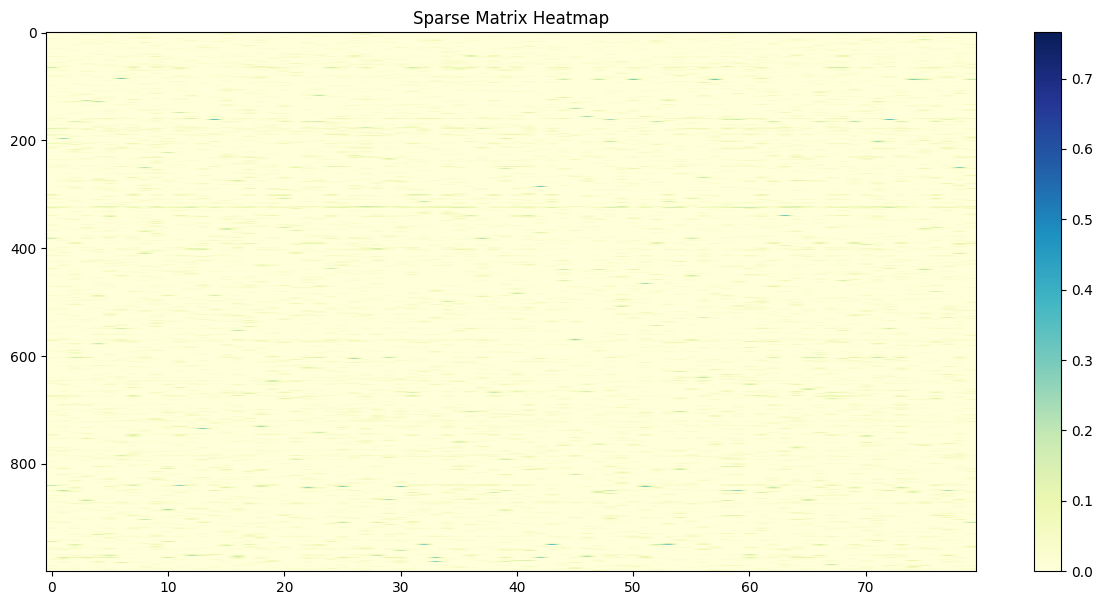

In [ ]:
A1 = A[:, 0:80]
A1 = A1.toarray()
A2 = A[:, 100:180]
A2 = A2.toarray()
A3 = A[:, 200:280]
A3 = A3.toarray()

# print(A1)
a1_test = A[:, 80:100]
a1_test = a1_test.toarray()
a2_test = A[:, 180:200]
a2_test = a2_test.toarray()
a3_test = A[:, 280:300]
a3_test = a3_test.toarray()

Atrain = np.hstack([A1,A2,A3])
# print(A.shape)

size_cluster = 80
size_test_cluster = 20

# print(A1.toarray())
c1 = np.matmul(A1,np.ones((size_cluster,1)))/size_cluster
c2 = np.matmul(A2,np.ones((size_cluster,1)))/size_cluster
c3 = np.matmul(A3,np.ones((size_cluster,1)))/size_cluster
c = np.matmul(Atrain,np.ones((3*size_cluster,1)))/(3*size_cluster)
e1 = np.ones((size_cluster, 1))

S_m = np.matmul(Atrain - c, (Atrain-c).T)

S_w = np.matmul((A1 - c1),(A1-c1).T) + np.matmul((A2 - c2),(A2-c2).T) + np.matmul((A3 - c3),(A3-c3).T)
print("Trace Sw = ", np.trace(S_w))

S_b = size_cluster*(np.matmul(c1 - c, (c1 - c).T) + np.matmul(c2 - c, (c2 - c).T) + np.matmul(c3 - c, (c3 - c).T))
print("Trace Sb = ", np.trace(S_b))

Hb = np.hstack([np.sqrt(size_cluster)*(c1 - c),np.sqrt(size_cluster)*(c2 - c),np.sqrt(size_cluster)*(c3 - c)])
# print("Hb dim= ",Hb.shape)

Hw = np.hstack([A1 - (c1@e1.T),A2 - (c2@e1.T),A3 - (c3@e1.T)])
# print("Hw dim= ",Hw.shape)

K = np.vstack([Hb.T,Hw.T])
print(K.shape)
# S_M = S_w + S_b
# print(S_m[0])
# print(S_M[0])

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))  # You can adjust the values (width, height) as needed
plt.imshow(A1, cmap='YlGnBu', aspect='auto')  # Use aspect='auto' to prevent distortion
plt.colorbar()
plt.title('Sparse Matrix Heatmap')
plt.show()


###Orthogonal Centroid

In [ ]:
C = np.hstack([c1,c2,c3])
print(C.shape)

Q_red, R_red = np.linalg.qr(C, mode='reduced')

print(R_red.shape)

(1000, 3)
(3, 3)


In [ ]:
y = Q_red.T@A
print(y.shape)

(3, 300)


In [ ]:
traceSbcenQR = np.trace(Q_red.T@S_b@Q_red)
print(traceSbcenQR)

traceSwcenQR = np.trace(Q_red.T@S_w@Q_red)
print(traceSwcenQR)

35.28863223400764
5.460782771616636


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# Knn = KNeighborsClassifier(n_neighbors=1).fit(y.T, clusters)
# a1test = Q_red.T@A
# clusters_cenqr = Knn.predict(y.T)
# print(clusters_cenqr)

###LDA/GSVD

(1000, 243)
Trace Sw =  7.108462815515414e-18
Trace Sb =  1.9999999999999987


Text(0.5, 1.0, 'PCA Cluster Plot')

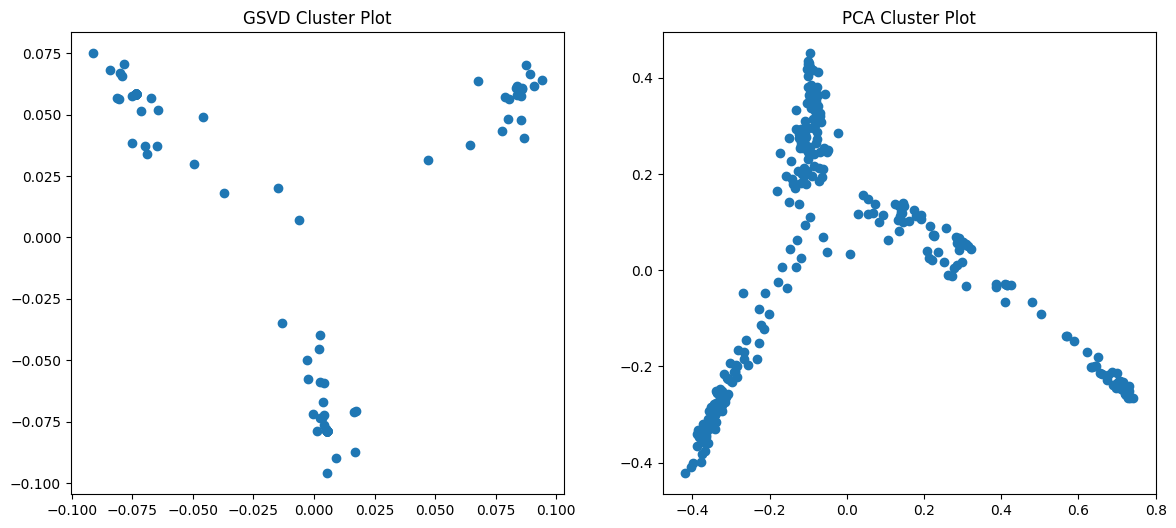

In [ ]:
K = np.vstack([Hb.T,Hw.T])
k = 3

U, S, Vh = np.linalg.svd(K, full_matrices=False)

Pt = U.T
Q = Vh.T
t = np.linalg.matrix_rank(K, tol=None, hermitian=False)
ptkq = Pt@K@Q
R = ptkq[0:t,0:t]
print(Q.shape)
R_inv = np.linalg.inv(R)

P = Pt.T
P = P[0:k,0:t]
U, S, Vh = np.linalg.svd(P, full_matrices=False)
W = Vh.T


RinvW = R_inv @ W
zeroes = np.zeros((4,3))
RinvWstacked = np.vstack([RinvW, zeroes])
X = Q@RinvWstacked
G = X[:,0:k-1]

traceSw = np.trace(G.T@S_w@G)
print("Trace Sw = ",traceSw)
traceSb = np.trace(G.T@S_b@G)
print("Trace Sb = ",traceSb)

# print(G.T@A)
Areduced = G.T@A

f, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(Areduced[0], Areduced[1])
ax[0].set_title('GSVD Cluster Plot')


pca = PCA(n_components=2).fit_transform(np.asarray(A.T.todense()))
idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)

ax[1].scatter(pca[idx, 0], pca[idx, 1])
ax[1].set_title('PCA Cluster Plot')

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=10).fit(Areduced.T, clusters)
# a1test = G.T@a3_test
# clusters_gsvd = knn.predict(Areduced.T)
# print(clusters_gsvd)
# print(clusters)

In [ ]:
# def get_top_keywords(data, clusters, labels, n_terms):
#     df = pd.DataFrame(data.todense()).groupby(clusters).mean()
#     # print(df)
#     # print(clusters.shape)
#     for i,r in df.iterrows():
#         # print(i)
#         # print(r)
#         print('\nCluster {}'.format(i))
#         print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
#         # pass
# get_top_keywords(text1, clusters, tfidf.get_feature_names_out(), 10)

### Eigenvectors of $S_w^{-1}S_b$

In [ ]:
# import scipy as sp
# sw_inv_sb = np.matmul(np.linalg.inv(S_w),S_b)
# eigvalues, eigvectors = np.linalg.eig(sw_inv_sb)

# # eigvalues = sp.linalg.eigh(S_b, S_w)


In [ ]:
# B = np.array([[1, 2, 3],
#               [2, 5, 6],
#               [3, 6, 9]])

# try:
#     # Attempting Cholesky decomposition
#     L = np.linalg.cholesky(S_w)
#     print("Cholesky decomposition successful.")
# except np.linalg.LinAlgError as e:
#     print(f"LinAlgError: {e}")

In [ ]:
# import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(np.real(eigvalues[0]), np.real(eigvalues[1]), np.real(eigvectors[0]), np.real(eigvectors[1]),)

#Over_Sampled Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from google.colab import drive

data1 = pd.read_csv('/content/drive/MyDrive/oversampled_data.csv')
data1.head()

,id,title,contents,date,topics,components,clusterid
0,09-485,U.S. Court of Appeals for the Fifth Circuit Jo...,"WASHINGTON - On May 15, 2009, the Fifth Circ...",2009-05-18T00:00:00-04:00,[],['Tax Division'],0
1,15-1452,Justice Department Sues to Shut Down Abusive T...,The United States filed a civil injunction sui...,2015-11-24T00:00:00-05:00,['Tax'],['Tax Division'],0
2,13-357,Three Sentenced in Alabama Stolen Identity Ref...,"Mary Bennett, Narendrakumar Patel and Eugeni...",2013-03-28T00:00:00-04:00,[],['Tax Division'],0
3,13-545,Las Vegas Physician Sentenced for Tax Evasion ...,"Robert David Forsyth, of Las Vegas, was se...",2013-05-13T00:00:00-04:00,[],['Tax Division'],0
4,09-1282,Federal Court Shuts Down Kansas City Tax Preparer,"WASHINGTON – A federal court in Kansas City,...",2009-11-27T00:00:00-05:00,[],['Tax Division'],0


In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.5,
    max_features = 50,
    stop_words = 'english'
)
tfidf.fit(data1.contents)
text1 = tfidf.transform(data1.contents)
# print(text1)

array_0 = np.zeros(300)
array_1 = np.ones(300)
array_5 = np.full(300, 5)
clusters1 = np.concatenate([array_0, array_1, array_5])

# print(clusters1)

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    # print(df)
    # print(clusters.shape)
    for i,r in df.iterrows():
        # print(i)
        # print(r)
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
        # pass
get_top_keywords(text1, clusters1, tfidf.get_feature_names_out(), 10)


Cluster 0.0
business,complaint,fraudulent,return,years,prison,income,irs,returns,tax

Cluster 1.0
company,count,prison,conspiracy,scheme,000,admitted,plea,sentenced,pleaded

Cluster 5.0
inspector,complaint,program,contract,allegations,said,act,civil,settlement,claims


##GSVD Implementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from google.colab import drive

clustered_data = pd.read_csv('/content/drive/MyDrive/oversampled_data.csv')
clustered_data.head()


,id,title,contents,date,topics,components,clusterid
0,09-485,U.S. Court of Appeals for the Fifth Circuit Jo...,"WASHINGTON - On May 15, 2009, the Fifth Circ...",2009-05-18T00:00:00-04:00,[],['Tax Division'],0
1,15-1452,Justice Department Sues to Shut Down Abusive T...,The United States filed a civil injunction sui...,2015-11-24T00:00:00-05:00,['Tax'],['Tax Division'],0
2,13-357,Three Sentenced in Alabama Stolen Identity Ref...,"Mary Bennett, Narendrakumar Patel and Eugeni...",2013-03-28T00:00:00-04:00,[],['Tax Division'],0
3,13-545,Las Vegas Physician Sentenced for Tax Evasion ...,"Robert David Forsyth, of Las Vegas, was se...",2013-05-13T00:00:00-04:00,[],['Tax Division'],0
4,09-1282,Federal Court Shuts Down Kansas City Tax Preparer,"WASHINGTON – A federal court in Kansas City,...",2009-11-27T00:00:00-05:00,[],['Tax Division'],0


In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.5,
    max_features = 100,
    stop_words = 'english'
)
tfidf.fit(clustered_data.contents)
text_ = tfidf.transform(clustered_data.contents)
print(text_.T.shape)
clusters = clustered_data['clusterid'].tolist()
print(clusters)

(100, 900)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

######CLusters Ai and other calculations

Trace Sm =  611.3907335675734
Trace Sw =  461.1090832045592
Trace Sb =  150.28165036301417
Trace S_wInv_Sb =  30.078703469522342
Trace S_wInv_Sm =  130.07870346952234
(783, 100)


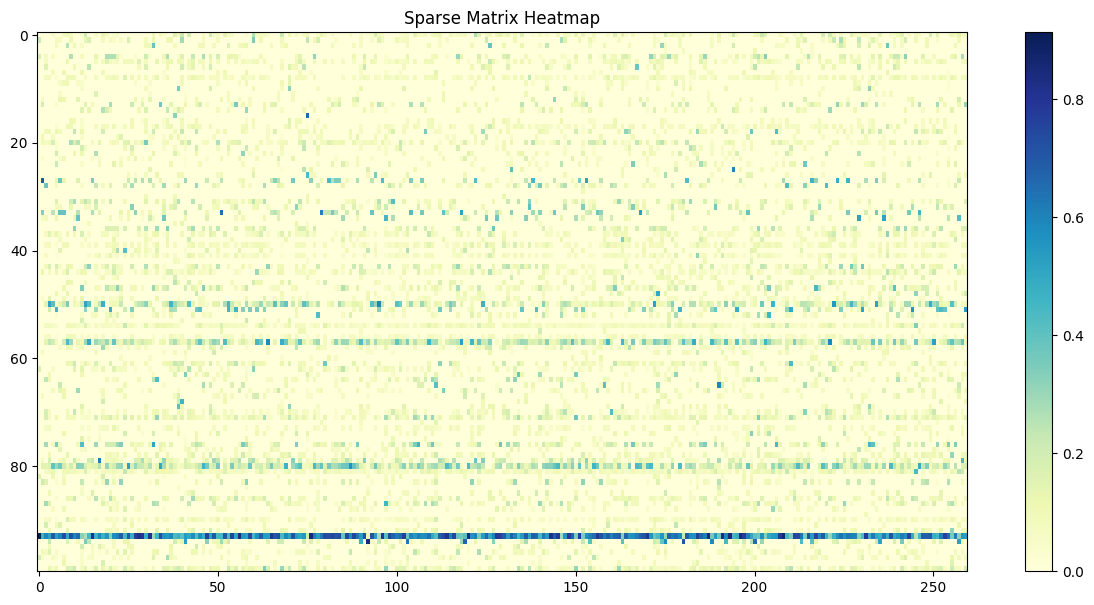

In [ ]:
A = text_.T
A1 = A[:, 0:260]
A1 = A1.toarray()
A2 = A[:, 300:560]
A2 = A2.toarray()
A3 = A[:, 600:860]
A3 = A3.toarray()

# print(A1)
a1_test = A[:, 260:300]
a1_test = a1_test.toarray()
a2_test = A[:, 560:600]
a2_test = a2_test.toarray()
a3_test = A[:, 860:900]
a3_test = a3_test.toarray()

Atrain = np.hstack([A1,A2,A3])
# print(A.shape)

size_cluster = 260
size_test_cluster = 40

# print(A1.toarray())
c1 = np.matmul(A1,np.ones((size_cluster,1)))/size_cluster
c2 = np.matmul(A2,np.ones((size_cluster,1)))/size_cluster
c3 = np.matmul(A3,np.ones((size_cluster,1)))/size_cluster
c = np.matmul(Atrain,np.ones((3*size_cluster,1)))/(3*size_cluster)
e1 = np.ones((size_cluster, 1))

S_m = np.matmul(Atrain - c, (Atrain-c).T)
print("Trace Sm = ", np.trace(S_m))

S_w = np.matmul((A1 - c1),(A1-c1).T) + np.matmul((A2 - c2),(A2-c2).T) + np.matmul((A3 - c3),(A3-c3).T)
print("Trace Sw = ", np.trace(S_w))

S_b = size_cluster*(np.matmul(c1 - c, (c1 - c).T) + np.matmul(c2 - c, (c2 - c).T) + np.matmul(c3 - c, (c3 - c).T))
print("Trace Sb = ", np.trace(S_b))

SwInv = np.linalg.inv(S_w)
print("Trace S_wInv_Sb = ", np.trace(SwInv@S_b))
print("Trace S_wInv_Sm = ", np.trace(SwInv@S_m))

Hb = np.hstack([np.sqrt(size_cluster)*(c1 - c),np.sqrt(size_cluster)*(c2 - c),np.sqrt(size_cluster)*(c3 - c)])
# print("Hb dim= ",Hb.shape)

Hw = np.hstack([A1 - (c1@e1.T),A2 - (c2@e1.T),A3 - (c3@e1.T)])
# print("Hw dim= ",Hw.shape)

K = np.vstack([Hb.T,Hw.T])
print(K.shape)
# S_M = S_w + S_b
# print(S_m[0])
# print(S_M[0])

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))  # You can adjust the values (width, height) as needed
plt.imshow(A1, cmap='YlGnBu', aspect='auto')  # Use aspect='auto' to prevent distortion
plt.colorbar()
plt.title('Sparse Matrix Heatmap')
plt.show()


###Orthogonal Centroid

In [ ]:
# C = np.hstack([c1,c2,c3])
# print(C.shape)

# Q_red, R_red = np.linalg.qr(C, mode='reduced')

# print(R_red.shape)

In [ ]:
# y = Q_red.T@A
# print(y.shape)

In [ ]:
# traceSbcenQR = np.trace(Q_red.T@S_b@Q_red)
# print(traceSbcenQR)

# traceSwcenQR = np.trace(Q_red.T@S_w@Q_red)
# print(traceSwcenQR)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# Knn = KNeighborsClassifier(n_neighbors=1).fit(y.T, clusters)
# a1test = Q_red.T@A
# clusters_cenqr = Knn.predict(y.T)
# print(clusters_cenqr)

###LDA/GSVD

(100, 100)
(100, 3)
Trace Sw =  0.16082101522117734
Trace Sb =  1.8391789847788231
Trace Sm =  1.9999999999999998
Trace SwInvSb =  30.078703469522342
Trace SwInvSm =  32.07870346952233
(100, 900)


Text(0.5, 1.0, 'PCA Cluster Plot')

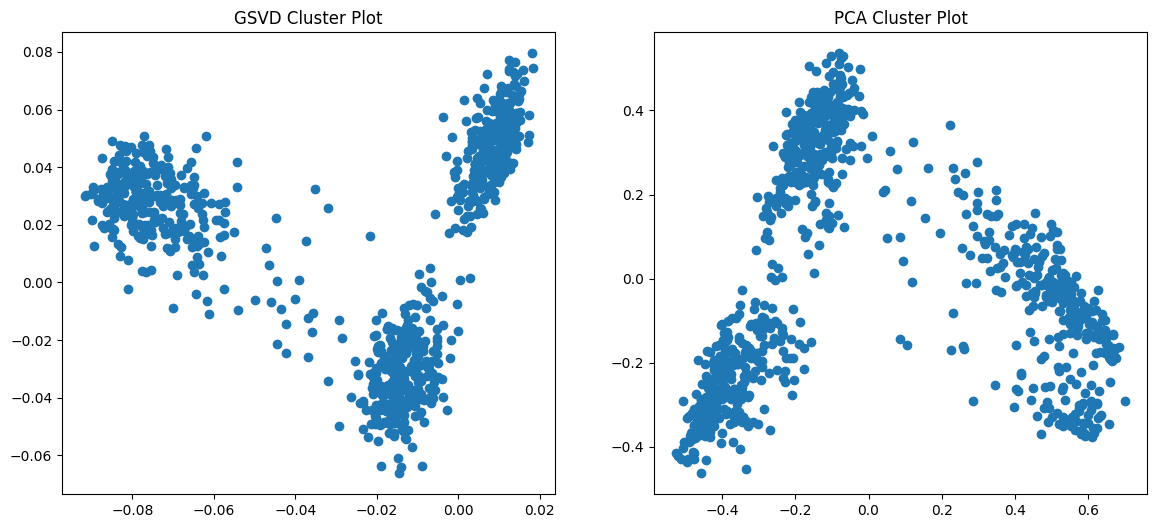

In [ ]:
K = np.vstack([Hb.T,Hw.T])
k = 3

U, S, Vh = np.linalg.svd(K, full_matrices=False)

Pt = U.T
Q = Vh.T
t = np.linalg.matrix_rank(K, tol=None, hermitian=False)
ptkq = Pt@K@Q
R = ptkq[0:t,0:t]
print(Q.shape)
R_inv = np.linalg.inv(R)

P = Pt.T
P = P[0:k,0:t]
U, S, Vh = np.linalg.svd(P, full_matrices=False)
W = Vh.T

RinvW = R_inv @ W
print(RinvW.shape)
# zeroes = np.zeros((4,3))
# RinvWstacked = np.vstack([RinvW, zeroes])
RinvWstacked = RinvW
X = Q@RinvWstacked
G = X[:,0:k-1]

SwGsvd = G.T@S_w@G
SbGsvd = G.T@S_b@G
SmGsvd = G.T@S_m@G
traceSw = np.trace(SwGsvd)
print("Trace Sw = ",traceSw)
traceSb = np.trace(SbGsvd)
print("Trace Sb = ",traceSb)
traceSm = np.trace(SmGsvd)
print("Trace Sm = ",traceSm)
SwInvGsvd = np.linalg.inv(SwGsvd)

traceSwInvSb = np.trace(SwInvGsvd@SbGsvd)
print("Trace SwInvSb = ",traceSwInvSb)
traceSwInvSm = np.trace(SwInvGsvd@SmGsvd)
print("Trace SwInvSm = ",traceSwInvSm)


# print(G.T@A)
Areduced = G.T@A

f, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(Areduced[0], Areduced[1])
ax[0].set_title('GSVD Cluster Plot')
print(A.shape)

pca = PCA(n_components=2).fit_transform(np.asarray(A.T.todense()))
idx = np.random.choice(range(pca.shape[0]), size=900, replace=False)

ax[1].scatter(pca[idx, 0], pca[idx, 1])
ax[1].set_title('PCA Cluster Plot')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10).fit(Areduced.T, clusters)
a1test = G.T@a3_test
clusters_gsvd = knn.predict(Areduced.T)
print(clusters_gsvd)
print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
# def get_top_keywords(data, clusters, labels, n_terms):
#     df = pd.DataFrame(data.todense()).groupby(clusters).mean()
#     # print(df)
#     # print(clusters.shape)
#     for i,r in df.iterrows():
#         # print(i)
#         # print(r)
#         print('\nCluster {}'.format(i))
#         print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
#         # pass
# get_top_keywords(text1, clusters, tfidf.get_feature_names_out(), 10)